In [1]:
import pygris

In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd

import requests

import seaborn as sns
from matplotlib import pyplot as plt
import holoviews as hv
import hvplot.pandas

import cenpy

pd.options.display.max_columns = 999
pd.options.display.max_colwidth = None

available = cenpy.explorer.available()

acs = available.filter(regex="^ACS", axis=0)

available.filter(regex="^ACSDT5Y", axis=0)

cenpy.explorer.explain("ACSDT5Y2022")

D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\libpysal\c

{'American Community Survey: 5-Year Estimates: Detailed Tables 5-Year': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population. Summary files include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts, all counties, all places, and all tracts and block groups. Summary files contain the most detailed cross-tabulations, many of which are published down to block groups. The data are population and housing counts. There are over 64,000 variables in this dataset.'}

In [3]:
acs = cenpy.remote.APIConnection("ACSDT5Y2022")

len(acs.variables)

28193

In [4]:
housing_cost = acs.varslike(
    pattern="MEDIAN MONTHLY HOUSING COSTS",
    by="concept",  # searches along concept column
).sort_index()
housing_cost.head(1)

Empty DataFrame
Columns: [label, concept, predicateType, group, limit, predicateOnly, hasGeoCollectionSupport, attributes, required]
Index: []

In [5]:
elderly = acs.varslike(
    pattern="Households with one or more people 60 years and over",
    by="label",  # searches along concept column
).sort_index()
elderly.head(1)

label  \
B11006_002E  Estimate!!Total:!!Households with one or more people 60 years and over:   

                                                                          concept  \
B11006_002E  Households by Presence of People 60 Years and Over by Household Type   

            predicateType   group limit predicateOnly hasGeoCollectionSupport  \
B11006_002E           int  B11006     0           NaN                     NaN   

                                        attributes required  
B11006_002E  B11006_002EA,B11006_002M,B11006_002MA      NaN

In [6]:
vacancy = acs.varslike(
    pattern="B25003",
    by="group",  # searches along concept column
).sort_index()
vacancy.head(3)

label  \
B25003A_001E                   Estimate!!Total:   
B25003A_002E   Estimate!!Total:!!Owner occupied   
B25003A_003E  Estimate!!Total:!!Renter occupied   

                                       concept predicateType    group limit  \
B25003A_001E  Tenure (White Alone Householder)           int  B25003A     0   
B25003A_002E  Tenure (White Alone Householder)           int  B25003A     0   
B25003A_003E  Tenure (White Alone Householder)           int  B25003A     0   

             predicateOnly hasGeoCollectionSupport  \
B25003A_001E           NaN                     NaN   
B25003A_002E           NaN                     NaN   
B25003A_003E           NaN                     NaN   

                                            attributes required  
B25003A_001E  B25003A_001EA,B25003A_001M,B25003A_001MA      NaN  
B25003A_002E  B25003A_002EA,B25003A_002M,B25003A_002MA      NaN  
B25003A_003E  B25003A_003EA,B25003A_003M,B25003A_003MA      NaN

In [7]:
ownership = acs.varslike(
    pattern="owner",
    by="label",  # searches along concept column
).sort_index()
ownership.head()

label  \
B07013PR_002E                                   Estimate!!Total:!!Householder lived in owner-occupied housing units   
B07013PR_005E           Estimate!!Total:!!Same house 1 year ago:!!Householder lived in owner-occupied housing units   
B07013PR_008E     Estimate!!Total:!!Moved within same municipio:!!Householder lived in owner-occupied housing units   
B07013PR_011E  Estimate!!Total:!!Moved from different municipio:!!Householder lived in owner-occupied housing units   
B07013PR_014E    Estimate!!Total:!!Moved from the United States:!!Householder lived in owner-occupied housing units   

                                                                                             concept  \
B07013PR_002E  Geographical Mobility in the Past Year by Tenure for Current Residence in Puerto Rico   
B07013PR_005E  Geographical Mobility in the Past Year by Tenure for Current Residence in Puerto Rico   
B07013PR_008E  Geographical Mobility in the Past Year by Tenure for Current Residence in Puerto Rico   
B07013PR_011E  Geographical Mobility in the Past Year by Tenure for Current Residence in Puerto Rico   
B07013PR_014E  Geographical Mobility in the Past Year by Tenure for Current Residence in Puerto Rico   

              predicateType     group limit predicateOnly  \
B07013PR_002E           int  B07013PR     0           NaN   
B07013PR_005E           int  B07013PR     0           NaN   
B07013PR_008E           int  B07013PR     0           NaN   
B07013PR_011E           int  B07013PR     0           NaN   
B07013PR_014E           int  B07013PR     0           NaN   

              hasGeoCollectionSupport  \
B07013PR_002E                     NaN   
B07013PR_005E                     NaN   
B07013PR_008E                     NaN   
B07013PR_011E                     NaN   
B07013PR_014E                     NaN   

                                                attributes required  
B07013PR_002E  B07013PR_002EA,B07013PR_002M,B07013PR_002MA      NaN  
B07013PR_005E  B07013PR_005EA,B07013PR_005M,B07013PR_005MA      NaN  
B07013PR_008E  B07013PR_008EA,B07013PR_008M,B07013PR_008MA      NaN  
B07013PR_011E  B07013PR_011EA,B07013PR_011M,B07013PR_011MA      NaN  
B07013PR_014E  B07013PR_014EA,B07013PR_014M,B07013PR_014MA      NaN

In [8]:
population = acs.varslike(
    pattern="Population",
    by="concept",  # searches along concept column
).sort_index()
population.head(1)

label           concept predicateType   group limit  \
B01003_001E  Estimate!!Total  Total Population           int  B01003     0   

            predicateOnly hasGeoCollectionSupport  \
B01003_001E           NaN                     NaN   

                                        attributes required  
B01003_001E  B01003_001EA,B01003_001M,B01003_001MA      NaN

In [9]:
poverty = acs.varslike(
    pattern="Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier",
    by="label",  # searches along concept column
).sort_index()
poverty.head(2)

Empty DataFrame
Columns: [label, concept, predicateType, group, limit, predicateOnly, hasGeoCollectionSupport, attributes, required]
Index: []

In [10]:
variables = [
    "NAME",
    "B11006_002E", #Households with one or more people 60 years and over
    "B25002_003E", #Vacancy
    "B25003_003E", #Renter Occupation
    "B01003_001E", #Total Population
    "B19013_001E", #Median household income
    "B25035_001E", #Median year built
]

In [106]:
NYC_county_code = ["005","047","061","081","085"]
NY_state_code = "36"

county_codes = ",".join(NYC_county_code)

NYC_demo_data = acs.query(
    cols=variables,
    geo_unit="block group:*",
    geo_filter={"state": NY_state_code, "county": county_codes, "tract": "*"},
)

NYC_demo_data.head()

NAME B11006_002E  \
0  Block Group 0; Census Tract 1; Bronx County; New York           0   
1  Block Group 1; Census Tract 1; Bronx County; New York           0   
2  Block Group 0; Census Tract 2; Bronx County; New York           0   
3  Block Group 1; Census Tract 2; Bronx County; New York         230   
4  Block Group 2; Census Tract 2; Bronx County; New York         302   

  B25002_003E B25003_003E B01003_001E B19013_001E B25035_001E state county  \
0           0           0           0  -666666666  -666666666    36    005   
1           0           0        4446  -666666666  -666666666    36    005   
2           0           0           0  -666666666  -666666666    36    005   
3          15          99        1210      123208        1953    36    005   
4          31         379        2111      115764        1964    36    005   

    tract block group  
0  000100           0  
1  000100           1  
2  000200           0  
3  000200           1  
4  000200           2

In [107]:
NYC_block_groups = pygris.block_groups(
    state=NY_state_code, county=NYC_county_code, year=2022
)

In [158]:
NYC_demo_final = NYC_block_groups.merge(
    NYC_demo_data,
    left_on=["STATEFP", "COUNTYFP", "TRACTCE", "BLKGRPCE"],
    right_on=["state", "county", "tract", "block group"],
)
NYC_demo_final.head(1)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      36      047  059403        1  360470594031  Block Group 1  G5030   

  FUNCSTAT  ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  64626       0  +40.5964380  -073.9474106   

                                                                                                                                                                                                                                 geometry  \
0  POLYGON ((-73.94905 40.59748, -73.94855 40.59753, -73.94812 40.59758, -73.94719 40.59768, -73.94623 40.59779, -73.94577 40.59540, -73.94674 40.59529, -73.94766 40.59519, -73.94859 40.59509, -73.94902 40.59735, -73.94905 40.59748))   

                                                         NAME B11006_002E  \
0  Block Group 1; Census Tract 594.03; Kings County; New York         142   

  B25002_003E B25003_003E B01003_001E B19013_001E B25035_001E state county  \
0          53          62        1185      125417        1938    36    047   

    tract block group  
0  059403           1

In [159]:
NYC_demo_final.rename(columns={
    "B11006_002E": "Households with 60+",
    "B25002_003E": "Vacancy",
    "B25003_003E": "Renter Occupation",
    "B01003_001E": "Total Population",
    "B19013_001E": "Median Household Income",
    "B25035_001E": "Median Year Built"
}, inplace=True)
NYC_demo_final['Households with 60+'] = pd.to_numeric(NYC_demo_final['Households with 60+'], errors='coerce').fillna(0).astype(float)
NYC_demo_final['Vacancy'] = pd.to_numeric(NYC_demo_final['Vacancy'], errors='coerce').fillna(0).astype(float)
NYC_demo_final['Renter Occupation'] = pd.to_numeric(NYC_demo_final['Renter Occupation'], errors='coerce').fillna(0).astype(float)
NYC_demo_final['Total Population'] = pd.to_numeric(NYC_demo_final['Total Population'], errors='coerce').fillna(0).astype(float)

NYC_demo_final['Median Household Income'] = pd.to_numeric(NYC_demo_final['Median Household Income'], errors='coerce').fillna(0).astype(float)
median1 = NYC_demo_final['Median Household Income'].median()
NYC_demo_final['Median Household Income'] = NYC_demo_final['Median Household Income'].mask(NYC_demo_final['Median Household Income'] < 0, median1)

NYC_demo_final['Median Year Built'] = pd.to_numeric(NYC_demo_final['Median Year Built'], errors='coerce').fillna(0).astype(float)
median2 = NYC_demo_final['Median Year Built'].median()
NYC_demo_final['Median Year Built'] = NYC_demo_final['Median Year Built'].mask(NYC_demo_final['Median Year Built'] < 0, median2)

NYC_demo_final.head(2)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      36      047  059403        1  360470594031  Block Group 1  G5030   
1      36      047  059403        2  360470594032  Block Group 2  G5030   

  FUNCSTAT  ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  64626       0  +40.5964380  -073.9474106   
1        S  76076       0  +40.5941323  -073.9474463   

                                                                                                                                                                                                                                 geometry  \
0  POLYGON ((-73.94905 40.59748, -73.94855 40.59753, -73.94812 40.59758, -73.94719 40.59768, -73.94623 40.59779, -73.94577 40.59540, -73.94674 40.59529, -73.94766 40.59519, -73.94859 40.59509, -73.94902 40.59735, -73.94905 40.59748))   
1  POLYGON ((-73.94952 40.59499, -73.94859 40.59509, -73.94766 40.59519, -73.94674 40.59529, -73.94577 40.59540, -73.94537 40.59328, -73.94634 40.59317, -73.94726 40.59307, -73.94819 40.59297, -73.94912 40.59287, -73.94952 40.59499))   

                                                         NAME  \
0  Block Group 1; Census Tract 594.03; Kings County; New York   
1  Block Group 2; Census Tract 594.03; Kings County; New York   

   Households with 60+  Vacancy  Renter Occupation  Total Population  \
0                142.0     53.0               62.0            1185.0   
1                120.0     77.0              106.0             800.0   

   Median Household Income  Median Year Built state county   tract block group  
0                 125417.0             1938.0    36    047  059403           1  
1                  88214.0             1938.0    36    047  059403           2

In [160]:
NYC_demo_final_Normalized = NYC_demo_final

NYC_demo_final_Normalized['Households with 60+'] = NYC_demo_final_Normalized['Households with 60+']/-1000
NYC_demo_final_Normalized['Vacancy'] = NYC_demo_final_Normalized['Vacancy']/500
NYC_demo_final_Normalized['Renter Occupation'] = NYC_demo_final_Normalized['Renter Occupation']/1500
NYC_demo_final_Normalized['Total Population'] = NYC_demo_final_Normalized['Total Population']/-6000
NYC_demo_final_Normalized['Median Household Income'] = NYC_demo_final_Normalized['Median Household Income']/-200000
NYC_demo_final_Normalized['Median Year Built'] = (NYC_demo_final_Normalized['Median Year Built'] - 1900)/122
NYC_demo_final_Normalized.head(1)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      36      047  059403        1  360470594031  Block Group 1  G5030   

  FUNCSTAT  ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  64626       0  +40.5964380  -073.9474106   

                                                                                                                                                                                                                                 geometry  \
0  POLYGON ((-73.94905 40.59748, -73.94855 40.59753, -73.94812 40.59758, -73.94719 40.59768, -73.94623 40.59779, -73.94577 40.59540, -73.94674 40.59529, -73.94766 40.59519, -73.94859 40.59509, -73.94902 40.59735, -73.94905 40.59748))   

                                                         NAME  \
0  Block Group 1; Census Tract 594.03; Kings County; New York   

   Households with 60+  Vacancy  Renter Occupation  Total Population  \
0               -0.142    0.106           0.041333           -0.1975   

   Median Household Income  Median Year Built state county   tract block group  
0                -0.627085           0.311475    36    047  059403           1

In [161]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [164]:
NYC_demo_final_Normalized_Indexed = NYC_demo_final_Normalized
NYC_demo_final_Normalized_Indexed.index = NYC_demo_final_Normalized_Indexed['GEOID']
columns_to_keep = ["Households with 60+","Vacancy","Renter Occupation",
                                   "Total Population","Median Household Income","Median Year Built"]
new_df = NYC_demo_final_Normalized_Indexed[columns_to_keep]

In [165]:
k = -(1/np.log(new_df.shape[0]))

def entropy(X):
    return (X*np.log(X)).sum()*k

entropy = new_df.apply(entropy)

dod = 1 - entropy

w = dod/dod.sum()
w.sort_values(ascending = False)

D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Median Year Built          0.461299
Renter Occupation          0.345718
Vacancy                    0.198211
Households with 60+       -0.001743
Total Population          -0.001743
Median Household Income   -0.001743
dtype: float64

In [166]:
NYC_demo_final_Normalized["Adaptivity"] = NYC_demo_final_Normalized['Vacancy']*0.198211
NYC_demo_final_Normalized.head()

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  \
GEOID                                                                         
360470594031      36      047  059403        1  360470594031  Block Group 1   
360470594032      36      047  059403        2  360470594032  Block Group 2   
360470594042      36      047  059404        2  360470594042  Block Group 2   
360470594041      36      047  059404        1  360470594041  Block Group 1   
360470594043      36      047  059404        3  360470594043  Block Group 3   

              MTFCC FUNCSTAT  ALAND  AWATER     INTPTLAT      INTPTLON  \
GEOID                                                                    
360470594031  G5030        S  64626       0  +40.5964380  -073.9474106   
360470594032  G5030        S  76076       0  +40.5941323  -073.9474463   
360470594042  G5030        S  75413       0  +40.5908487  -073.9477886   
360470594041  G5030        S  96434       0  +40.5908731  -073.9455877   
360470594043  G5030        S  42052       0  +40.5906922  -073.9492328   

                                                                                                                                                                                                                                            geometry  \
GEOID                                                                                                                                                                                                                                                  
360470594031  POLYGON ((-73.94905 40.59748, -73.94855 40.59753, -73.94812 40.59758, -73.94719 40.59768, -73.94623 40.59779, -73.94577 40.59540, -73.94674 40.59529, -73.94766 40.59519, -73.94859 40.59509, -73.94902 40.59735, -73.94905 40.59748))   
360470594032  POLYGON ((-73.94952 40.59499, -73.94859 40.59509, -73.94766 40.59519, -73.94674 40.59529, -73.94577 40.59540, -73.94537 40.59328, -73.94634 40.59317, -73.94726 40.59307, -73.94819 40.59297, -73.94912 40.59287, -73.94952 40.59499))   
360470594042                                          POLYGON ((-73.94912 40.59287, -73.94819 40.59297, -73.94726 40.59307, -73.94686 40.59095, -73.94646 40.58883, -73.94738 40.58873, -73.94831 40.58863, -73.94872 40.59075, -73.94912 40.59287))   
360470594041  POLYGON ((-73.94726 40.59307, -73.94634 40.59317, -73.94537 40.59328, -73.94497 40.59116, -73.94401 40.59126, -73.94361 40.58915, -73.94457 40.58904, -73.94553 40.58893, -73.94646 40.58883, -73.94686 40.59095, -73.94726 40.59307))   
360470594043                                                                                  POLYGON ((-73.95015 40.59275, -73.94912 40.59287, -73.94872 40.59075, -73.94831 40.58863, -73.94934 40.58851, -73.94975 40.59063, -73.95015 40.59275))   

                                                                    NAME  \
GEOID                                                                      
360470594031  Block Group 1; Census Tract 594.03; Kings County; New York   
360470594032  Block Group 2; Census Tract 594.03; Kings County; New York   
360470594042  Block Group 2; Census Tract 594.04; Kings County; New York   
360470594041  Block Group 1; Census Tract 594.04; Kings County; New York   
360470594043  Block Group 3; Census Tract 594.04; Kings County; New York   

              Households with 60+  Vacancy  Renter Occupation  \
GEOID                                                           
360470594031               -0.142    0.106           0.041333   
360470594032               -0.120    0.154           0.070667   
360470594042               -0.185    0.098           0.114667   
360470594041               -0.261    0.000           0.108000   
360470594043               -0.317    0.000           0.441333   

              Total Population  Median Household Income  Median Year Built  \
GEOID                                                                        
360470594031         -0.197500                -0.627085   

In [169]:
NYC_demo_final_Normalized["Adaptivity"] = NYC_demo_final_Normalized["Adaptivity"] + 0.461299*NYC_demo_final_Normalized['Median Year Built']

In [170]:
NYC_demo_final_Normalized["Adaptivity"] = NYC_demo_final_Normalized["Adaptivity"] + 0.345718*NYC_demo_final_Normalized['Renter Occupation']

In [214]:
columns_to_keep_2 = ["GEOID","Adaptivity","geometry","NAME"]
NYC_Adaptive_Capacity = NYC_demo_final_Normalized[columns_to_keep_2]
NYC_Adaptive_Capacity.reset_index(inplace=True, drop=True)
NYC_Adaptive_Capacity.head()

GEOID  Adaptivity  \
0  360470594031    0.178983   
1  360470594032    0.198639   
2  360470594042    0.202750   
3  360470594041    0.181021   
4  360470594043    0.326509   

                                                                                                                                                                                                                                 geometry  \
0  POLYGON ((-73.94905 40.59748, -73.94855 40.59753, -73.94812 40.59758, -73.94719 40.59768, -73.94623 40.59779, -73.94577 40.59540, -73.94674 40.59529, -73.94766 40.59519, -73.94859 40.59509, -73.94902 40.59735, -73.94905 40.59748))   
1  POLYGON ((-73.94952 40.59499, -73.94859 40.59509, -73.94766 40.59519, -73.94674 40.59529, -73.94577 40.59540, -73.94537 40.59328, -73.94634 40.59317, -73.94726 40.59307, -73.94819 40.59297, -73.94912 40.59287, -73.94952 40.59499))   
2                                          POLYGON ((-73.94912 40.59287, -73.94819 40.59297, -73.94726 40.59307, -73.94686 40.59095, -73.94646 40.58883, -73.94738 40.58873, -73.94831 40.58863, -73.94872 40.59075, -73.94912 40.59287))   
3  POLYGON ((-73.94726 40.59307, -73.94634 40.59317, -73.94537 40.59328, -73.94497 40.59116, -73.94401 40.59126, -73.94361 40.58915, -73.94457 40.58904, -73.94553 40.58893, -73.94646 40.58883, -73.94686 40.59095, -73.94726 40.59307))   
4                                                                                  POLYGON ((-73.95015 40.59275, -73.94912 40.59287, -73.94872 40.59075, -73.94831 40.58863, -73.94934 40.58851, -73.94975 40.59063, -73.95015 40.59275))   

                                                         NAME  
0  Block Group 1; Census Tract 594.03; Kings County; New York  
1  Block Group 2; Census Tract 594.03; Kings County; New York  
2  Block Group 2; Census Tract 594.04; Kings County; New York  
3  Block Group 1; Census Tract 594.04; Kings County; New York  
4  Block Group 3; Census Tract 594.04; Kings County; New York

In [215]:
Criteria1_2 = pd.read_csv('./analysis/Data/Adaptive_And_Development.csv')
NYC_Adaptive_Capacity['GEOID'] = NYC_Adaptive_Capacity['GEOID'].astype(str)
NYC_Adaptive_Capacity['GEOID'] = NYC_Adaptive_Capacity['GEOID'].apply(lambda x: x[:-1])
Criteria1_2['GEOID'] = Criteria1_2['GEOID'].astype(str)

D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [216]:
Criteria1_2.head()

OID_        GEOID     ALAND     AWATER            NAME     State  \
0     1  36085000300  377461.0  2080565.0  Census Tract 3  New York   
1     2  36085000600  666769.0  2045497.0  Census Tract 6  New York   
2     3  36085000700  528114.0   605460.0  Census Tract 7  New York   
3     4  36085000800  799850.0        0.0  Census Tract 8  New York   
4     5  36085000900  231877.0        0.0  Census Tract 9  New York   

            County  B01001_001E  B25002_001E  B25002_002E  B25002_003E  \
0  Richmond County         2187         1224         1087          137   
1  Richmond County         2484         1439         1309          130   
2  Richmond County         4578         2203         1940          263   
3  Richmond County         5751         2196         1926          270   
4  Richmond County         1924         1006          740          266   

   HOUSING_DENSITY   ADAPTIVE  DEVELOPMENT  
0         3.242719   5.454462    18.831325  
1         2.158169  10.511640    33.906883  
2         4.171448   3.337458    26.703180  
3         2.745515  12.783682    30.304741  
4         4.338507   2.344675    30.374046

In [217]:
Adaptive_Capacity = NYC_Adaptive_Capacity.merge(Criteria1_2, on='GEOID')
max_value_1 = Adaptive_Capacity['ADAPTIVE'].max()
max_value_2 = Adaptive_Capacity['DEVELOPMENT'].max()
Adaptive_Capacity['ADAPTIVE'] = Adaptive_Capacity['ADAPTIVE']/ max_value_1
Adaptive_Capacity['DEVELOPMENT'] = Adaptive_Capacity['DEVELOPMENT']/ max_value_2

In [218]:
columns_to_keep_3 = ['ADAPTIVE','DEVELOPMENT',"Adaptivity"]
Final_TOPSIS = Adaptive_Capacity[columns_to_keep_3]

In [219]:
k = -(1/np.log(Final_TOPSIS.shape[0]))

def entropy(X):
    return (X*np.log(X)).sum()*k

entropy = Final_TOPSIS.apply(entropy)

dod = 1 - entropy

w = dod/dod.sum()
w.sort_values(ascending = False)

D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Adaptivity     0.352945
ADAPTIVE       0.329026
DEVELOPMENT    0.318029
dtype: float64

In [222]:
columns_to_keep_4 = ["GEOID",'ADAPTIVE','DEVELOPMENT',"Adaptivity","geometry","NAME_x"]
Conclusion = Adaptive_Capacity[columns_to_keep_4]
Conclusion["TOPSIS_CALIBRATED"]=Conclusion["Adaptivity"]*0.352945 + Conclusion[
    "ADAPTIVE"]*0.329026 + Conclusion["DEVELOPMENT"]*0.318029

D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [240]:
Conclusion.fillna(0, inplace=True)

C:\Users\Josh Williamson\AppData\Local\Temp\ipykernel_15076\4250588969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Conclusion.fillna(0, inplace=True)


In [251]:
import altair as alt
from vega_datasets import data as vega_data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(Conclusion[['ADAPTIVE','DEVELOPMENT','Adaptivity']])
Conclusion['label'] = kmeans.labels_
Conclusion.head()

D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


GEOID  ADAPTIVE  DEVELOPMENT  Adaptivity  \
0  36047059403  0.584123     0.539059    0.178983   
1  36047059403  0.584123     0.539059    0.198639   
2  36047059403  0.584123     0.539059    0.300804   
3  36047059404  0.487518     0.442388    0.202750   
4  36047059404  0.487518     0.442388    0.181021   

                                                                                                                                                                                                                                 geometry  \
0  POLYGON ((-73.94905 40.59748, -73.94855 40.59753, -73.94812 40.59758, -73.94719 40.59768, -73.94623 40.59779, -73.94577 40.59540, -73.94674 40.59529, -73.94766 40.59519, -73.94859 40.59509, -73.94902 40.59735, -73.94905 40.59748))   
1  POLYGON ((-73.94952 40.59499, -73.94859 40.59509, -73.94766 40.59519, -73.94674 40.59529, -73.94577 40.59540, -73.94537 40.59328, -73.94634 40.59317, -73.94726 40.59307, -73.94819 40.59297, -73.94912 40.59287, -73.94952 40.59499))   
2  POLYGON ((-73.95101 40.59726, -73.94997 40.59738, -73.94905 40.59748, -73.94902 40.59735, -73.94859 40.59509, -73.94952 40.59499, -73.94912 40.59287, -73.95015 40.59275, -73.95055 40.59487, -73.95088 40.59661, -73.95101 40.59726))   
3                                          POLYGON ((-73.94912 40.59287, -73.94819 40.59297, -73.94726 40.59307, -73.94686 40.59095, -73.94646 40.58883, -73.94738 40.58873, -73.94831 40.58863, -73.94872 40.59075, -73.94912 40.59287))   
4  POLYGON ((-73.94726 40.59307, -73.94634 40.59317, -73.94537 40.59328, -73.94497 40.59116, -73.94401 40.59126, -73.94361 40.58915, -73.94457 40.58904, -73.94553 40.58893, -73.94646 40.58883, -73.94686 40.59095, -73.94726 40.59307))   

                                                       NAME_x  \
0  Block Group 1; Census Tract 594.03; Kings County; New York   
1  Block Group 2; Census Tract 594.03; Kings County; New York   
2  Block Group 3; Census Tract 594.03; Kings County; New York   
3  Block Group 2; Census Tract 594.04; Kings County; New York   
4  Block Group 1; Census Tract 594.04; Kings County; New York   

   TOPSIS_CALIBRATED  label  
0           0.426799      1  
1           0.433737      1  
2           0.469795      1  
3           0.372658      1  
4           0.364989      1

In [254]:
columns_to_keep_5 = ['ADAPTIVE','DEVELOPMENT',"Adaptivity","label"]
Conclusion_Chart = Conclusion[columns_to_keep_5]
Conclusion_Chart = Conclusion_Chart.head(5000)

ADAPTIVE  DEVELOPMENT  Adaptivity  label
0  0.584123     0.539059    0.178983      1
1  0.584123     0.539059    0.198639      1
2  0.584123     0.539059    0.300804      1
3  0.487518     0.442388    0.202750      1
4  0.487518     0.442388    0.181021      1

In [259]:
(
    alt.Chart(Conclusion_Chart)
    .mark_circle()
    .encode(
        alt.X("ADAPTIVE", scale=alt.Scale(zero=False)),
        alt.Y("DEVELOPMENT", scale=alt.Scale(zero=False)),
        size="Adaptivity",
        color=alt.Color("label", scale=alt.Scale(scheme="viridis")),
        tooltip=list(Conclusion_Chart.columns),
    )
    .properties(width=400, height=300)
    .interactive()
)

alt.Chart(...)

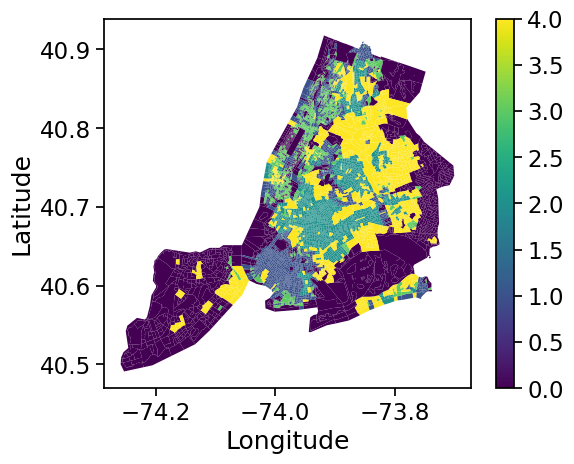

In [247]:
Conclusion.plot(column='label', legend=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
D:\Mamba\envs\musa-550-fall-2023\lib\site-packages\seaborn\axisgrid.py:1609: Use

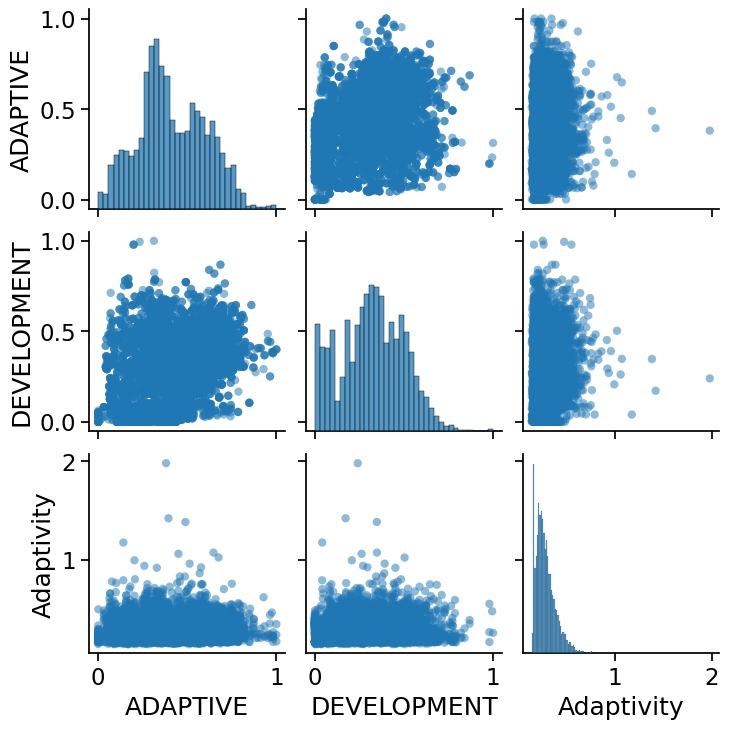

In [35]:
Elderly_People = NYC_demo_final.to_crs(epsg=3857).hvplot(
    c="Households with 60+",
    frame_width=600,
    frame_height=600,
    alpha=0.7,
    geo=True,
    crs=3857,
    line_width=0.3,
    line_color='white',
    cmap="viridis",
    hover_cols=["Households with 60+"],
)
Elderly_People

:Polygons   [Longitude,Latitude]   (Vacancy)

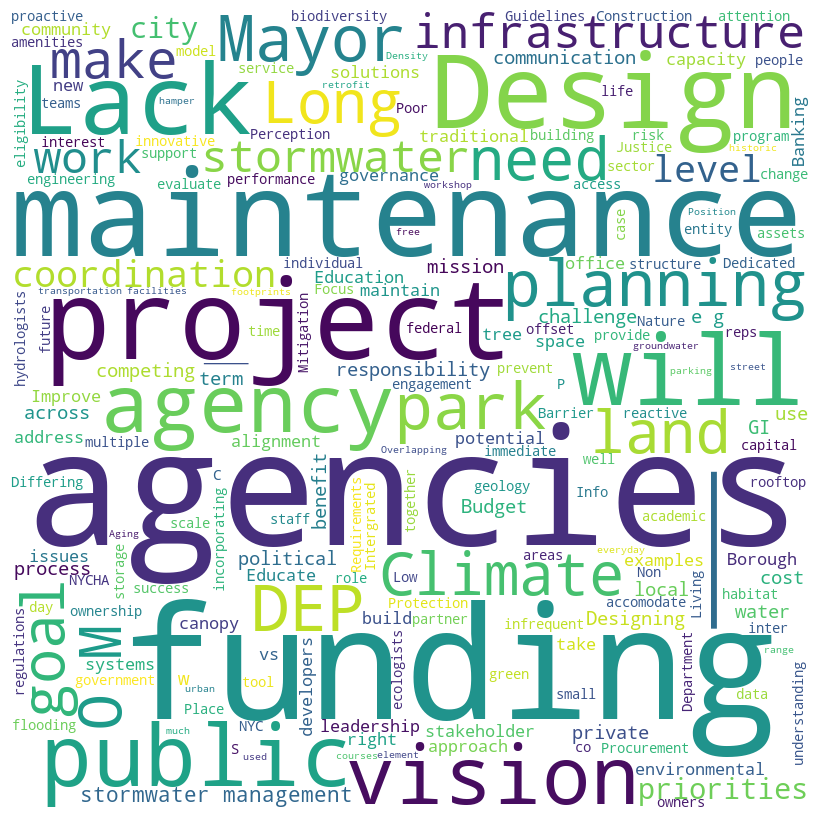

In [49]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_1 = pd.read_csv('./Data/a.csv')

text = ' '.join(df_1['response'].dropna())

wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      min_font_size=10).generate(text)
                       
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
  
plt.show()

In [50]:
ROW_D = gpd.read_file('./Shapefiles/Detention.shp')
ROW_D.head()

assembly_d  asset_area  asset_id  asset_leng                   asset_type  \
0        52.0      1092.0  106022.0         0.0  Subsurface Detention System   
1        52.0       560.0  106044.0         0.0  Subsurface Detention System   
2        52.0      1388.0  106049.0         0.0  Subsurface Detention System   
3        28.0       504.0  106085.0         0.0  Subsurface Detention System   
4        37.0      1773.0  106090.0         0.0  Subsurface Detention System   

   asset_widt    asset_x_co    asset_y_co           bbl   borough  city_counc  \
0         0.0  9.887021e+05  187744.73807  3.003940e+09  Brooklyn        33.0   
1         0.0  9.869173e+05  188813.67431  3.003970e+09  Brooklyn        33.0   
2         0.0  9.853902e+05  187550.45420  3.004420e+09  Brooklyn        39.0   
3         0.0  1.019317e+06  198028.13250  4.037960e+09    Queens        30.0   
4         0.0  1.010978e+06  196031.50308  4.034800e+09    Queens        30.0   

   community_ construc_1 constructi dep_cont_1        dep_contra  gi_feature  \
0       306.0          1  GI-CONS-1          1  OGI-DESIGN-1-OS7         NaN   
1       306.0          1  GI-CONS-1          1  OGI-DESIGN-1-OS1         NaN   
2       306.0          1  GI-CONS-1          1  OGI-DESIGN-1-OS2         NaN   
3       405.0          1  GI-CONS-1          3  OGI-DESIGN-1-OS6         NaN   
4       405.0          1  GI-CONS-1          3  OGI-DESIGN-1-OS9         NaN   

      gi_id     nyc_waters  outfall     program_ar                 project_na  \
0     WG-U2  Gowanus Canal   RH-034  Public Onsite            Wyckoff Gardens   
1    BP-US1  Gowanus Canal   RH-034  Public Onsite                Boerum Park   
2  CP-US-BF  Gowanus Canal   RH-034  Public Onsite               Carroll Park   
3  MVP-US-2  Newtown Creek  NCB-083  Public Onsite  Middle Village Playground   
4   RP-US-3  Newtown Creek  NCB-083  Public Onsite       Rosemarys Playground   

  row_onsite  secondary_ sewer_type           status       status_gro  \
0     Onsite         0.0   Combined  In Construction  In Construction   
1     Onsite         0.0   Combined  In Construction  In Construction   
2     Onsite         0.0   Combined  In Construction  In Construction   
3     Onsite         0.0   Combined  In Construction  In Construction   
4     Onsite         0.0   Combined  In Construction  In Construction   

  tree_commo tree_latin                    geometry  
0        NaN        NaN  POINT (-73.98395 40.68199)  
1        NaN        NaN  POINT (-73.99038 40.68493)  
2        NaN        NaN  POINT (-73.99589 40.68146)  
3        NaN        NaN  POINT (-73.87351 40.71015)  
4        NaN        NaN  POINT (-73.90360 40.70470)

In [56]:

ROW_D.to_crs(epsg=3857).hvplot(
    frame_width=600,
    frame_height=600,
    geo=True,
    crs=3857,
    tiles='CartoLight',
    cmap="viridis",
    hover_cols=["asset_area"],
)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (asset_area)